In [1]:
import pandas as pd

df = pd.read_csv('output.csv', encoding='UTF-8')

In [2]:

# Convert the 'Date Collected' and 'Reporting Date' columns to datetime objects with the correct dayfirst setting
df['Date Collected'] = pd.to_datetime(df['Date Collected'], dayfirst=True, errors='coerce')
df['Reporting Date_x'] = pd.to_datetime(df['Reporting Date_x'], dayfirst=True, errors='coerce')
df['Reporting Date_y'] = pd.to_datetime(df['Reporting Date_y'], dayfirst=True, errors='coerce')

# Filter the DataFrame to only include rows with 'Cosine Similarity' > 0.5
# By using .loc with a condition, you are explicitly working with a copy


# Calculate the 'Delta Date' column as the difference between 'Reporting Date' and 'Date Collected'
# Since df_filtered is now a copy, this operation should not raise the warning
df['Delta Date_x'] =  df['Date Collected'] - df['Reporting Date_x']
df['Delta Date_y'] = df['Date Collected']- df['Reporting Date_y'] 

# Convert the 'Delta Date' to a number of days (as integers)
df['Delta Date_knn'] = df['Delta Date_x'].dt.days
df['Delta Date_cos'] = df['Delta Date_y'].dt.days
# To avoid the SettingWithCopyWarning, use .loc to perform operations on the original df


# Check the filtered DataFrame
print(df)

            TTDescription Date Collected  KNN match confidence  \
0                       _     2023-07-04                  1.00   
1                     ___     2023-07-04                  1.00   
2                  _marwe     2023-12-04                  1.00   
3               musically     2023-07-04                  1.00   
4               musically     2023-07-04                  1.00   
...                   ...            ...                   ...   
226515     wholesale toys     2023-07-04                  0.28   
226516       whole salmon     2023-07-04                  0.20   
226517         whole slab     2023-07-04                  0.34   
226518          wholesome     2023-07-04                  0.50   
226519  wholesome cooking            NaT                  0.33   

                       AmzSearchTerm Reporting Date_x Delta Date_x  \
0                                 $6       2023-05-13      52 days   
1                                 $6       2023-05-13      52 days 

In [1]:
# Refined list of kitchen-related keywords without specific duplicates
kitchen_category_words = [
    'kitchen', 'cook', 'pan', 'pot', 'bake', 'oven', 'stove', 'mixer', 'blender', 'utensil', 'grill', 'chef',
    'liquid', 'coffee', 'espresso', 'tea', 'cup', 'mug', 'spoon', 'fork', 'knife', 'plate', 'bowl', 'dish',
    'saucepan', 'kettle', 'toaster', 'processor', 'spatula', 'peeler', 'grater', 'colander', 'sieve',
    'measuring', 'mixing', 'salad', 'opener', 'corkscrew', 'storage', 'lunchbox', 'bottle', 'thermos', 'soap',
    'sponge', 'brush', 'mop', 'broom', 'dustpan', 'garbage', 'recycling', 'compost', 'parchment', 'foil',
    'wrap', 'ice', 'chopsticks', 'placemat', 'coaster', 'trivet', 'tray', 'pitcher', 'carafe', 'glass',
    'teacup', 'silverware', 'napkin', 'tablecloth', 'shaker', 'grinder', 'infuser', 'cutter', 'mold', 'pie',
    'loaf', 'scale', 'timer', 'thermometer', 'slicer', 'mandoline', 'juicer', 'scoop', 'cutter', 'box',
    'tongs', 'rolling', 'brush', 'mill', 'cooker', 'fryer', 'sous vide', 'crepe', 'waffle', 'sandwich',
    'rice', 'steamer', 'popcorn', 'grain', 'pasta', 'frother', 'baking', 'roasting', 'cutting', 'mortar',
    'pestle', 'garlic', 'citrus', 'corer', 'melon', 'chopper', 'masher', 'whisk', 'ladle', 'skimmer', 
    'slotted', 'grill', 'tenderizer', 'press', 'injector', 'holders', 'skewers', 'stone', 'peel', 
    'scraper', 'rack', 'mat', 'board', 'board', 'fondue', 'wine', 'beer', 'cocktail', 'martini', 'highball', 
    'decanter', 'chiller', 'bucket', 'bar', 'muddler', 'jigger', 'strainer', 'zester', 'cap', 'towel',
    'corks', 'stoppers', 'pourers', 'saver', 'growler', 'flask', 'pint', 'shot', 'stones', 'brewing', 'caddy', 
    'rack', 'stemware', 'cabinet', 'cellar', 'dispenser', 'kegerator', 'preserver', 'maker', 'dispenser', 
    'filter', 'soda', 'mixers', 'smoothie', 'protein', 'pitcher', 'carafe', 'infuser', 'pot', 'grinder', 
    'roaster', 'tamper', 'holder', 'filter', 'box', 'warmer', 'pitcher', 'sugar', 'cream', 'honey', 
    'syrup', 'jam', 'caddy', 'oil', 'vinegar', 'salt', 'pepper', 'spice', 'nutcracker', 'seafood', 
    'lobster', 'oyster', 'clam', 'fish', 'sushi', 'rice', 'net', 'mold', 'pan', 'grill', 
    'thermos', 'carving', 'roasting', 'paring', 'whisk', 'cleaver', 'carafe', 'flask', 'goblet', 'tumbler', 
    'crockery', 'flatware', 'cutlery', 'tumbler', 'goblet', 'chalice', 'steamer', 'colander', 'sifter', 
    'strainer', 'grater', 'zester', 'juicer', 'reamer', 'pitter', 'huller', 'masher', 'ricer', 'shredder', 
    'mandoline', 'tenderizer', 'mallet', 'pounder', 'chopper', 'dicer', 'mincer', 'grinder',"Juicer", "Oven", 
    "Stove", "Blender", "Toaster", "Microwave", "Refrigerator", "Freezer", "Grinder", "Mixer",
    "Kettle", "Spatula", "Whisk", "Ladle", "Tongs", "Peeler", "Grater", "Knife", "Fork", 
    "Spoon", "Pan", "Pot", "Bowl", "Plate", "Cup", "Mug", "Glass", "Colander", "Sieve", "Thermometer",
    "Timer", "Scale", "Opener", "Sealer", "Chopper", "Cutter", "Slicer", "Corer", "Pitter", "Press",
    "Grill", "Steamer", "Roaster", "Skillet", "Wok", "Tray", "Rack", "Basket", "Jar", "Pitcher",
    "Infuser", "Strainer", "Dispenser", "Masher", "Roller", "Crusher", "Beater", "Baster", "Brush",
    "Scoop", "Shears", "Tenderizer", "Zester", "Shredder", "Mortar", "Pestle", "Siphon", "Funnel", 
    "Lid", "Mat", "Pad", "Cloth", "Napkin", "Towel", "Glove", "Mitt", "Apron", "Holder", "Stand", 
    "Rack", "Hook", "Clip", "Magnet", "Chain", "Ring", "Ball", "Cube", "Stick", "Pin", "Needle", 
    "Skewer", "Spike", "Spoon", "Fork", "Knife", "Spork", "Tongs", "Spade", "Shovel", "Spatula", 
    "Ladle", "Jug", "Bottle", "Flask", "Canteen", "Thermos", "Vase", "Pot", "Kettle", "Teapot", 
    "Cauldron", "Churn", "Dasher", "Griddle", "Hood", "Vent", "Pipe", "Tube", "Nozzle", "Sprayer", 
    "Pump", "Squeezer", "Stamper", "Tamper", "Tenderizer", "Twister", "Whip", "Whisk", "Winder", 
    "Zester", "Zipper", "Dredger", "Fryer", "Poacher", "Simmer", "Steamer", "Broiler", "Charbroiler",
    "Smoker", "Toaster", "Baker", "Roaster", "Sear", "Blancher", "Boiler", "Braiser", "Stewer", 
    "Cooker", "Griller", "Rotisserie", "Sauteer", "Scalder", "Sterilizer", "Warmer", "Cooler", 
    "Freezer", "Chiller", "Refrigerator", "Icebox", "Cabinet", "Closet", "Pantry", "Shelf", "Bin", 
    "Drawer", "Crate", "Box", "Case", "Packet", "Sack", "Bag", "Pouch", "Envelope", "Wrapper", 
    "Cover", "Cap", "Lid", "Top", "Seal", "Plug", "Stopper", "Cork", "Cap", "Liner", "Padding", 
    "Insulation", "Filling", "Stuffing", "Padding", "Lining", "Coating", "Glaze", "Film", "Layer", 
    "Sheet", "Membrane", "Skin", "Shell", "Husk", "Rind", "Peel", "Bark", "Crust", "Scale", "Feather", 
    "Fur", "Hair", "Wool", "Silk", "Cotton", "Linen", "Hemp", "Jute", "Sisal", "Fiber", "Thread", 
    "Yarn", "String", "Rope", "Cord", "Wire", "Cable", "Chain", "Belt", "Strap", "Band", "Ring", 
    "blanch", "braise", "broil", "caramelize", "churn", "clarify", "condiment", "debone", "deglaze", 
    "dice", "emulsify", "ferment", "fillet", "flambé", "fold", "garnish", "glaze", "julienne", "knead", 
    "leaven", "marinate", "mince", "poach", "puree", "reduce", "render", "sauté", "scald", "score", 
    "sear", "season", "segment", "shuck", "sift", "simmer", "skewer", "steam", "stew", "stir-fry", 
    "temper", "tenderize", "thicken", "whip", "zest", "batter", "breadcrumb", "brine", "broth", "chutney", 
    "compote", "confection", "coulis", "dough", "dressing", "filling", "fond", "gluten", "larder", 
    "marinade", "mirepoix", "roux", "sashimi", "stock", "syrup", "tartar", "umami", "vinaigrette", 
    "yeast", "zucchini", "quinoa", "polenta", "masala", "kimchi", "kombucha", "halloumi", "ghee", "focaccia", 
    "edamame", "daikon", "couscous", "bok choy", "aioli", "agnolotti", "affogato", "adobo", "acai", 
    "butcher", "caramelize", "charcuterie", "convection", "curd", "fermentation", "frittata", "ganache", 
    "gelatin", "gnocchi", "harissa", "hollandaise", "macerate", "maillard", "miso", "mousse", "nectar", 
    "panko", "parboil", "pasteurize", "pâté", "pecorino", "pesto", "pickling", "pilaf", "pinot", "plating", 
    "probiotic", "quiche", "ramekin", "remoulade", "roulade", "sabayon", "sake", "salpicon", "sashimi", 
    "soufflé", "sourdough", "tapenade", "terrine", "tofu", "umami", "velouté", "wasabi", "whey", "yuzu",
    "aerate", "bain-marie", "batonnet", "bechamel", "blini", "bouillon", "brioche", "calamari", "cassoulet", 
    "ceviche", "chiffonade", "ciabatta", "clafoutis", "confit", "consomme", "croissant", "crudo", "crumble", 
    "custard", "dashi", "dumpling", "enchilada", "escabeche", "escargot", "fajita", "falafel", "flan", 
    "focaccia", "foie gras", "fondant", "frittata", "fritter", "gazpacho", "gelato", "gnudi", "goulash", 
    "gratin", "gumbo", "halva", "hummus", "jambalaya", "kebab", "ketchup", "kimchi", "lacto-fermentation", 
    "lardon", "lasagna", "macaron", "maki", "masala", "matcha", "mochi", "moussaka", "nigiri", "nougat", 
    "okonomiyaki", "paella", "panettone", "pate", "patissier", "pho", "pico de gallo", "pierogi", "pita", 
    "polenta", "ponzu", "prosciutto", "quesadilla", "quinoa", "ratatouille", "ravioli", "relish", "risotto", 
    "roux", "saganaki", "sake", "salumi", "samosa", "sashimi", "satay", "scone", "seitan", "semifreddo", 
    "shawarma", "shiitake", "shortbread", "soba", "souvlaki", "spaetzle", "spanakopita", "speculoos", 
    "sponge cake", "spring roll", "squid ink", "sriracha", "stagiaire", "sushi", "taco", "tagine", "tahini", 
    "tamale", "tandoori", "tapas", "tempura", "teriyaki", "tex-mex", "tiramisu", "toque", "torte", 
    "tortilla", "tzatziki", "udon", "vichyssoise", "wakame", "xanthan gum", "yakitori", "yellowtail", 
    "za'atar", "zabaglione", "zakuski", "zeppole", "ziti", "zucchini blossoms"
]


In [3]:
kitchen_category_words = ['kitchen', 'cook', 'pan', 'pot', 'bake', 'oven', 'stove', 'mixer', 'blender', 'utensil', 'grill', 'chef', 'liquid', 'coffee', 'espresso', 'tea', 'cup', 'mug', 'spoon', 'fork', 'knife', 'plate', 'bowl', 'dish', 'saucepan', 'kettle', 'toaster', 'processor', 'spatula', 'peeler', 'grater', 'colander', 'sieve', 'measuring', 'mixing', 'salad', 'opener', 'corkscrew', 'storage', 'lunchbox', 'bottle', 'thermos', 'soap', 'sponge', 'brush', 'mop', 'broom', 'dustpan', 'garbage', 'recycling', 'compost', 'parchment', 'foil', 'wrap', 'ice', 'chopsticks', 'placemat', 'coaster', 'trivet', 'tray', 'pitcher', 'carafe', 'glass', 'teacup', 'silverware', 'napkin', 'tablecloth', 'shaker', 'grinder', 'infuser', 'cutter', 'mold', 'pie', 'loaf', 'scale', 'timer', 'thermometer', 'slicer', 'mandoline', 'juicer', 'scoop', 'box', 'tongs', 'rolling', 'mill', 'cooker', 'fryer', 'sous vide', 'crepe', 'waffle', 'sandwich', 'rice', 'steamer', 'popcorn', 'grain', 'pasta', 'frother', 'baking', 'roasting', 'cutting', 'mortar', 'pestle', 'garlic', 'citrus', 'corer', 'melon', 'chopper', 'masher', 'whisk', 'ladle', 'skimmer', 'slotted', 'tenderizer', 'press', 'injector', 'holders', 'skewers', 'stone', 'peel', 'scraper', 'rack', 'mat', 'board', 'fondue', 'wine', 'beer', 'cocktail', 'martini', 'highball', 'decanter', 'chiller', 'bucket', 'bar', 'muddler', 'jigger', 'strainer', 'zester', 'cap', 'towel', 'corks', 'stoppers', 'pourers', 'saver', 'growler', 'flask', 'pint', 'shot', 'stones', 'brewing', 'caddy', 'stemware', 'cabinet', 'cellar', 'dispenser', 'kegerator', 'preserver', 'maker', 'filter', 'soda', 'mixers', 'smoothie', 'protein', 'roaster', 'tamper', 'holder', 'warmer', 'sugar', 'cream', 'honey', 'syrup', 'jam', 'oil', 'vinegar', 'salt', 'pepper', 'spice', 'nutcracker', 'seafood', 'lobster', 'oyster', 'clam', 'fish', 'sushi', 'net', 'carving', 'paring', 'cleaver', 'goblet', 'tumbler', 'crockery', 'flatware', 'cutlery', 'chalice', 'sifter', 'reamer', 'pitter', 'huller', 'ricer', 'shredder', 'mallet', 'pounder', 'dicer', 'mincer', 'Juicer', 'Oven', 'Stove', 'Blender', 'Toaster', 'Microwave', 'Refrigerator', 'Freezer', 'Grinder', 'Mixer', 'Kettle', 'Spatula', 'Whisk', 'Ladle', 'Tongs', 'Peeler', 'Grater', 'Knife', 'Fork', 'Spoon', 'Pan', 'Pot', 'Bowl', 'Plate', 'Cup', 'Mug', 'Glass', 'Colander', 'Sieve', 'Thermometer', 'Timer', 'Scale', 'Opener', 'Sealer', 'Chopper', 'Cutter', 'Slicer', 'Corer', 'Pitter', 'Press', 'Grill', 'Steamer', 'Roaster', 'Skillet', 'Wok', 'Tray', 'Rack', 'Basket', 'Jar', 'Pitcher', 'Infuser', 'Strainer', 'Dispenser', 'Masher', 'Roller', 'Crusher', 'Beater', 'Baster', 'Brush', 'Scoop', 'Shears', 'Tenderizer', 'Zester', 'Shredder', 'Mortar', 'Pestle', 'Siphon', 'Funnel', 'Lid', 'Mat', 'Pad', 'Cloth', 'Napkin', 'Towel', 'Glove', 'Mitt', 'Apron', 'Holder', 'Stand', 'Hook', 'Clip', 'Magnet', 'Chain', 'Ring', 'Ball', 'Cube', 'Stick', 'Pin', 'Needle', 'Skewer', 'Spike', 'Spork', 'Spade', 'Shovel', 'Jug', 'Bottle', 'Flask', 'Canteen', 'Thermos', 'Vase', 'Teapot', 'Cauldron', 'Churn', 'Dasher', 'Griddle', 'Hood', 'Vent', 'Pipe', 'Tube', 'Nozzle', 'Sprayer', 'Pump', 'Squeezer', 'Stamper', 'Tamper', 'Twister', 'Whip', 'Winder', 'Zipper', 'Dredger', 'Fryer', 'Poacher', 'Simmer', 'Broiler', 'Charbroiler', 'Smoker', 'Baker', 'Sear', 'Blancher', 'Boiler', 'Braiser', 'Stewer', 'Cooker', 'Griller', 'Rotisserie', 'Sauteer', 'Scalder', 'Sterilizer', 'Warmer', 'Cooler', 'Chiller', 'Icebox', 'Cabinet', 'Closet', 'Pantry', 'Shelf', 'Bin', 'Drawer', 'Crate', 'Box', 'Case', 'Packet', 'Sack', 'Bag', 'Pouch', 'Envelope', 'Wrapper', 'Cover', 'Cap', 'Top', 'Seal', 'Plug', 'Stopper', 'Cork', 'Liner', 'Padding', 'Insulation', 'Filling', 'Stuffing', 'Lining', 'Coating', 'Glaze', 'Film', 'Layer', 'Sheet', 'Membrane', 'Skin', 'Shell', 'Husk', 'Rind', 'Peel', 'Bark', 'Crust', 'Feather', 'Fur', 'Hair', 'Wool', 'Silk', 'Cotton', 'Linen', 'Hemp', 'Jute', 'Sisal', 'Fiber', 'Thread', 'Yarn', 'String', 'Rope', 'Cord', 'Wire', 'Cable', 'Belt', 'Strap', 'Band', 'blanch', 'braise', 'broil', 'caramelize', 'churn', 'clarify', 'condiment', 'debone', 'deglaze', 'dice', 'emulsify', 'ferment', 'fillet', 'flambé', 'fold', 'garnish', 'glaze', 'julienne', 'knead', 'leaven', 'marinate', 'mince', 'poach', 'puree', 'reduce', 'render', 'sauté', 'scald', 'score', 'sear', 'season', 'segment', 'shuck', 'sift', 'simmer', 'skewer', 'steam', 'stew', 'stir-fry', 'temper', 'tenderize', 'thicken', 'whip', 'zest', 'batter', 'breadcrumb', 'brine', 'broth', 'chutney', 'compote', 'confection', 'coulis', 'dough', 'dressing', 'filling', 'fond', 'gluten', 'larder', 'marinade', 'mirepoix', 'roux', 'sashimi', 'stock', 'tartar', 'umami', 'vinaigrette', 'yeast', 'zucchini', 'quinoa', 'polenta', 'masala', 'kimchi', 'kombucha', 'halloumi', 'ghee', 'focaccia', 'edamame', 'daikon', 'couscous', 'bok choy', 'aioli', 'agnolotti', 'affogato', 'adobo', 'acai', 'butcher', 'charcuterie', 'convection', 'curd', 'fermentation', 'frittata', 'ganache', 'gelatin', 'gnocchi', 'harissa', 'hollandaise', 'macerate', 'maillard', 'miso', 'mousse', 'nectar', 'panko', 'parboil', 'pasteurize', 'pâté', 'pecorino', 'pesto', 'pickling', 'pilaf', 'pinot', 'plating', 'probiotic', 'quiche', 'ramekin', 'remoulade', 'roulade', 'sabayon', 'sake', 'salpicon', 'soufflé', 'sourdough', 'tapenade', 'terrine', 'tofu', 'velouté', 'wasabi', 'whey', 'yuzu', 'aerate', 'bain-marie', 'batonnet', 'bechamel', 'blini', 'bouillon', 'brioche', 'calamari', 'cassoulet', 'ceviche', 'chiffonade', 'ciabatta', 'clafoutis', 'confit', 'consomme', 'croissant', 'crudo', 'crumble', 'custard', 'dashi', 'dumpling', 'enchilada', 'escabeche', 'escargot', 'fajita', 'falafel', 'flan', 'foie gras', 'fondant', 'fritter', 'gazpacho', 'gelato', 'gnudi', 'goulash', 'gratin', 'gumbo', 'halva', 'hummus', 'jambalaya', 'kebab', 'ketchup', 'lacto-fermentation', 'lardon', 'lasagna', 'macaron', 'maki', 'matcha', 'mochi', 'moussaka', 'nigiri', 'nougat', 'okonomiyaki', 'paella', 'panettone', 'pate', 'patissier', 'pho', 'pico de gallo', 'pierogi', 'pita', 'ponzu', 'prosciutto', 'quesadilla', 'ratatouille', 'ravioli', 'relish', 'risotto', 'saganaki', 'salumi', 'samosa', 'satay', 'scone', 'seitan', 'semifreddo', 'shawarma', 'shiitake', 'shortbread', 'soba', 'souvlaki', 'spaetzle', 'spanakopita', 'speculoos', 'sponge cake', 'spring roll', 'squid ink', 'sriracha', 'stagiaire', 'taco', 'tagine', 'tahini', 'tamale', 'tandoori', 'tapas', 'tempura', 'teriyaki', 'tex-mex', 'tiramisu', 'toque', 'torte', 'tortilla', 'tzatziki', 'udon', 'vichyssoise', 'wakame', 'xanthan gum', 'yakitori', 'yellowtail', "za'atar", 'zabaglione', 'zakuski', 'zeppole', 'ziti', 'zucchini blossoms']

In [2]:
def remove_duplicates(input_list):
    # Initialize an empty list to store unique elements
    unique_list = []
    # Use a set to track seen elements for O(1) lookups
    seen = set()
    for item in input_list:
        # If the item hasn't been seen before, add it to both the unique_list and seen set
        if item not in seen:
            unique_list.append(item)
            seen.add(item)
    return unique_list

# Example usage
no_duplicates_list = remove_duplicates(kitchen_category_words)
print(no_duplicates_list)


['kitchen', 'cook', 'pan', 'pot', 'bake', 'oven', 'stove', 'mixer', 'blender', 'utensil', 'grill', 'chef', 'liquid', 'coffee', 'espresso', 'tea', 'cup', 'mug', 'spoon', 'fork', 'knife', 'plate', 'bowl', 'dish', 'saucepan', 'kettle', 'toaster', 'processor', 'spatula', 'peeler', 'grater', 'colander', 'sieve', 'measuring', 'mixing', 'salad', 'opener', 'corkscrew', 'storage', 'lunchbox', 'bottle', 'thermos', 'soap', 'sponge', 'brush', 'mop', 'broom', 'dustpan', 'garbage', 'recycling', 'compost', 'parchment', 'foil', 'wrap', 'ice', 'chopsticks', 'placemat', 'coaster', 'trivet', 'tray', 'pitcher', 'carafe', 'glass', 'teacup', 'silverware', 'napkin', 'tablecloth', 'shaker', 'grinder', 'infuser', 'cutter', 'mold', 'pie', 'loaf', 'scale', 'timer', 'thermometer', 'slicer', 'mandoline', 'juicer', 'scoop', 'box', 'tongs', 'rolling', 'mill', 'cooker', 'fryer', 'sous vide', 'crepe', 'waffle', 'sandwich', 'rice', 'steamer', 'popcorn', 'grain', 'pasta', 'frother', 'baking', 'roasting', 'cutting', 'mor

In [4]:
len(kitchen_category_words)

722

In [4]:
# Search in knn
def is_kitchen_item(search_term_knn, kitchen_words):
    """Check if the search term contains any kitchen word."""
    return any(word in search_term_knn.lower() for word in kitchen_words)

# Use the corrected function in the DataFrame apply method
df['Kitchen Category_knn'] = df['AmzSearchTerm'].apply(lambda x: is_kitchen_item(x, kitchen_category_words))


In [5]:
# Search in cos
def is_kitchen_item(search_term_cos, kitchen_words):
    """Check if the search term contains any kitchen word."""
    return any(word in search_term_cos.lower() for word in kitchen_words)

# Use the corrected function in the DataFrame apply method
df['Kitchen Category_cos'] = df['SearchTerm'].apply(lambda x: is_kitchen_item(x, kitchen_category_words))

In [ ]:
print(df)

In [37]:
# KNN
df['KNN match confidence'] = pd.to_numeric(df['KNN match confidence'], errors='coerce')

df_kitchen_true = df[df['Kitchen Category_knn'] == True]

# Filter the DataFrame to only include rows with 'Cosine Similarity' > 0.5
df_filtered_knn = df_kitchen_true[df_kitchen_true['KNN match confidence'] > 0.5]


In [18]:
df_filtered_knn.to_csv('kitch_knn.csv', index=False)

In [39]:

# Convert 'Delta Date_x' from a string that looks like '-52 days' to a timedelta
df_filtered_knn['Delta Date_x'] = pd.to_timedelta(df_filtered_knn['Delta Date_x'])

# Now you can extract the number of days as integers
df_filtered_knn['Delta Date_x'] = df_filtered_knn['Delta Date_x'].dt.days

C:\Users\m1379\AppData\Local\Temp\ipykernel_72388\2782188979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_knn['Delta Date_x'] = pd.to_timedelta(df_filtered_knn['Delta Date_x'])
C:\Users\m1379\AppData\Local\Temp\ipykernel_72388\2782188979.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_knn['Delta Date_x'] = df_filtered_knn['Delta Date_x'].dt.days


In [8]:
len(df_filtered_knn)

20095

In [41]:
df_filtered_knn['Delta Date_x'].describe()

count    17963.000000
mean        86.734287
std         69.011089
min       -303.000000
25%         66.000000
50%         97.000000
75%        116.000000
max        260.000000
Name: Delta Date_x, dtype: float64

In [ ]:
import matplotlib.pyplot as plt


# Plotting the 'Delta Date Days' column
plt.figure(figsize=(10, 6))
plt.hist(df_filtered_knn['Delta Date_x'], bins=50, alpha=0.7, color='blue')
plt.title('Distribution of Delta Dates')
plt.xlabel('Delta Days')
plt.ylabel('Frequency')
plt.show()

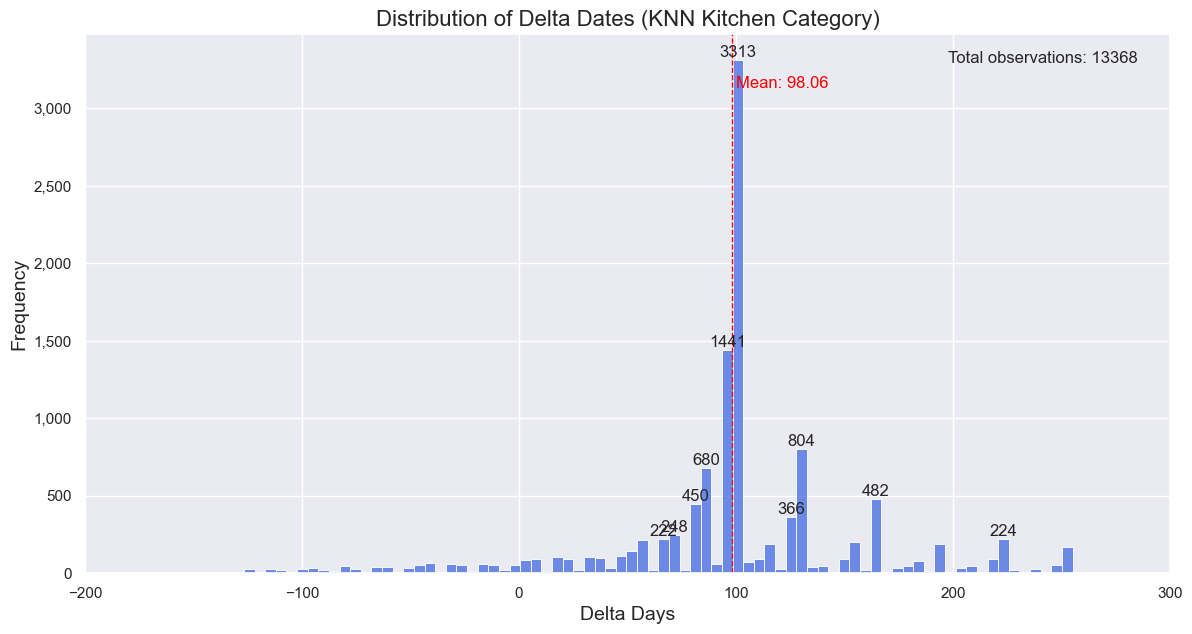

In [20]:
# Your plotting code here

import matplotlib.pyplot as plt
import matplotlib.ticker
import seaborn as sns
import numpy as np

sns.set(style="darkgrid")

# Increase the figure size
plt.figure(figsize=(14, 7))

# Calculate the bin size. Here's an example using the square root rule
num_bins = int(np.sqrt(len(df_filtered_knn['Delta Date_x'])))

# Plotting the 'Delta Date Days' column
ax = sns.histplot(df_filtered_knn['Delta Date_x'], bins=num_bins, kde=False, color='royalblue')

# Calculate the mean of the 'Delta Date Days' and add a vertical line for it
mean_delta_days = df_filtered_knn['Delta Date_x'].mean()
plt.axvline(mean_delta_days, color='red', linestyle='dashed', linewidth=1)

# Annotate the mean line
plt.text(mean_delta_days + 2, plt.ylim()[1] * 0.9, f'Mean: {mean_delta_days:.2f}', color='red')

# Get the patches and sort them by height
top_patches = sorted(ax.patches, key=lambda x: x.get_height(), reverse=True)[:10]

# Annotate the top 20 bins with the count of observations
for p in top_patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'{int(y)}', (x, y), ha='center', va='bottom')
    
# set the locator
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xlim(-200, 300)

# Improve labels and title
plt.title('Distribution of Delta Dates (KNN Kitchen Category)', fontsize=16)
plt.xlabel('Delta Days', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Annotate with the total number of observations
total_observations = len(df_filtered_knn)
plt.text(0.97, 0.97, f'Total observations: {total_observations}', transform=ax.transAxes,
         verticalalignment='top', horizontalalignment='right', fontsize=12)

# Show the plot
plt.show()

In [42]:
# Cosine
df['Cosine Similarity'] = pd.to_numeric(df['Cosine Similarity'], errors='coerce')
df_kitchen_true = df[df['Kitchen Category_cos'] == True]
# Filter the DataFrame to only include rows with 'Cosine Similarity' > 0.5
df_filtered_cos = df_kitchen_true[df_kitchen_true['Cosine Similarity'] > 0.5]

In [23]:
len(df_filtered_cos)

39144

In [46]:
#df_filtered_cos['Delta Date_y_float'] = df_filtered_cos['Delta Date_y'].dt.total_seconds() / 86400
df_filtered_cos['Delta Date_y_float'].describe()

count    49631.000000
mean        72.234732
std         74.793103
min       -303.000000
25%         31.000000
50%         90.000000
75%        101.000000
max        260.000000
Name: Delta Date_y_float, dtype: float64

In [20]:
df_filtered_cos.to_csv('kitch_cos.csv', index=False)

In [45]:
# Convert 'Delta Date_x' from a string that looks like '-52 days' to a timedelta
df_filtered_cos['Delta Date_y'] = pd.to_timedelta(df_filtered_cos['Delta Date_y'])

# Now you can extract the number of days as integers
df_filtered_cos['Delta Date_y'] = df_filtered_cos['Delta Date_y'].dt.days

C:\Users\m1379\AppData\Local\Temp\ipykernel_72388\1354476868.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_cos['Delta Date_y'] = pd.to_timedelta(df_filtered_cos['Delta Date_y'])
C:\Users\m1379\AppData\Local\Temp\ipykernel_72388\1354476868.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_cos['Delta Date_y'] = df_filtered_cos['Delta Date_y'].dt.days


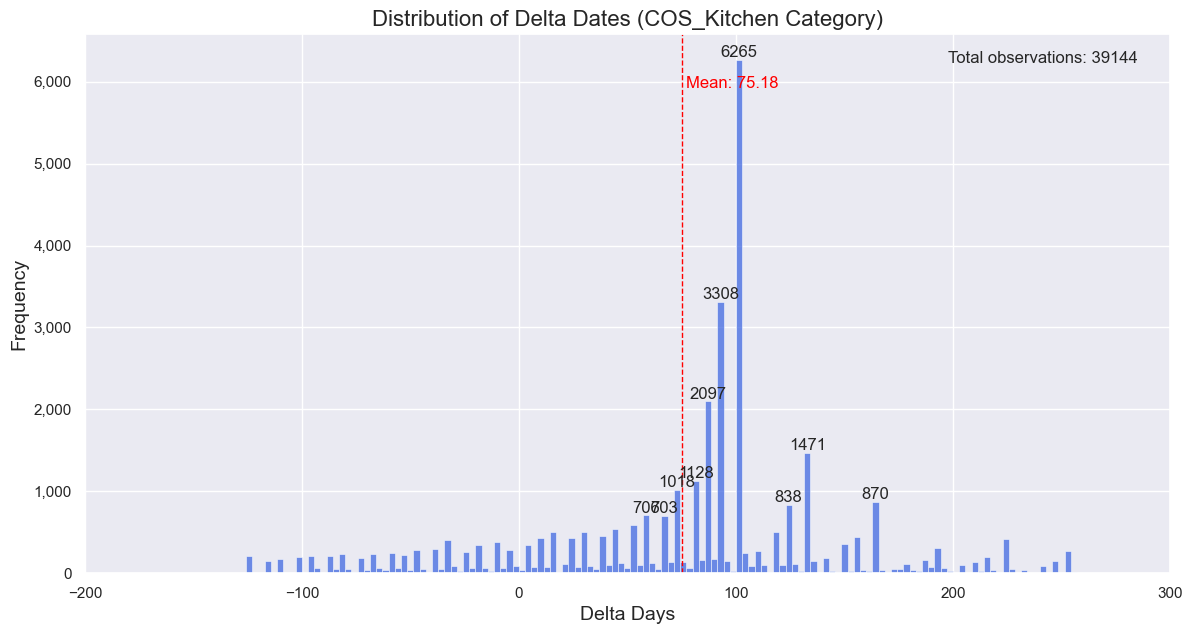

In [25]:
# cos

sns.set(style="darkgrid")

# Increase the figure size
plt.figure(figsize=(14, 7))

# Calculate the bin size. Here's an example using the square root rule
num_bins = int(np.sqrt(len(df_filtered_cos['Delta Date_y'])))

# Plotting the 'Delta Date Days' column
ax = sns.histplot(df_filtered_cos['Delta Date_y'], bins=num_bins, kde=False, color='royalblue')

# Calculate the mean of the 'Delta Date Days' and add a vertical line for it
mean_delta_days = df_filtered_cos['Delta Date_y'].mean()
plt.axvline(mean_delta_days, color='red', linestyle='dashed', linewidth=1)

# Annotate the mean line
plt.text(mean_delta_days + 2, plt.ylim()[1] * 0.9, f'Mean: {mean_delta_days:.2f}', color='red')

# Get the patches and sort them by height
top_patches = sorted(ax.patches, key=lambda x: x.get_height(), reverse=True)[:10]

# Annotate the top 20 bins with the count of observations
for p in top_patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'{int(y)}', (x, y), ha='center', va='bottom')

# set the locator
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xlim(-200, 300)


# Improve labels and title
plt.title('Distribution of Delta Dates (COS_Kitchen Category)', fontsize=16)
plt.xlabel('Delta Days', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Annotate with the total number of observations
total_observations = len(df_filtered_cos)
plt.text(0.97, 0.97, f'Total observations: {total_observations}', transform=ax.transAxes,
         verticalalignment='top', horizontalalignment='right', fontsize=12)

# Show the plot
plt.show()

In [ ]:
print(head.df_filtered_cos)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))

# Convert 'Delta Date_y' to numeric, handling errors by coercing to NaN, then drop NaNs
df_filtered_cos['Delta Date_y'] = pd.to_numeric(df_filtered_cos['Delta Date_y'], errors='coerce')
df_filtered_cos = df_filtered_cos.dropna(subset=['Delta Date_y'])

# Assuming 'Delta Date_y' are differences in days as integers
# Check for extreme values and decide on a reasonable range for the histogram, if needed
mean = df_filtered_cos['Delta Date_y'].mean()
std = df_filtered_cos['Delta Date_y'].std()
cut_off = std * 3  # You can adjust the number of standard deviations
lower, upper = mean - cut_off, mean + cut_off

# Filter out values beyond 3 standard deviations from the mean
df_filtered_cos = df_filtered_cos[(df_filtered_cos['Delta Date_y'] >= lower) & 
                                  (df_filtered_cos['Delta Date_y'] <= upper)]

# Plotting the 'Delta Date Days' column with a reasonable number of bins
num_bins = 50  # Adjust the number of bins as needed
ax = sns.histplot(df_filtered_cos['Delta Date_y'], bins=num_bins, kde=False, color='royalblue')

# Calculate the mean of the 'Delta Date Days' and add a vertical line for it
mean_delta_days = df_filtered_cos['Delta Date_y'].mean()
plt.axvline(mean_delta_days, color='red', linestyle='dashed', linewidth=1)

# Annotate the mean line
plt.text(mean_delta_days + 2, plt.ylim()[1] * 0.9, f'Mean: {mean_delta_days:.2f}', color='red')

# Improve labels and title
plt.title('Distribution of Delta Dates (Cosine Similarity Score above 0.5)', fontsize=16)
plt.xlabel('Delta Days', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Annotate with the total number of observations
total_observations = len(df_filtered_cos)
plt.text(0.97, 0.97, f'Total observations: {total_observations}', transform=ax.transAxes,
         verticalalignment='top', horizontalalignment='right', fontsize=12)

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Define the figure size and the number of bins
plt.figure(figsize=(15, 8))
num_bins = 50

# Generate the histogram plot
ax = sns.histplot(df_filtered_cos['Delta Date_y'], bins=num_bins, kde=False, color='skyblue')

# Set the same x-axis and y-axis limits for both histograms for consistency
ax.set_xlim(-300, 300)
ax.set_ylim(0, 20000)

# Add gridlines
plt.grid(True)

# Calculate the mean and add a vertical line for it
mean_delta_days = df_filtered_cos['Delta Date_y'].mean()
plt.axvline(mean_delta_days, color='darkred', linestyle='dashed', linewidth=2)

# Annotate the mean line
plt.text(mean_delta_days + 10, plt.ylim()[1] * 0.95, f'Mean: {mean_delta_days:.2f}', color='darkred')

# Improve the title and axis labels
plt.title('Distribution of Delta Dates (Cosine Similarity Score above 0.5)', fontsize=18)
plt.xlabel('Delta Days', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Only annotate significant bars if necessary
for p in ax.patches:
    height = p.get_height()
    if height > 1000:  # Set a threshold for significance
        ax.text(p.get_x() + p.get_width() / 2., height + 200, f'{height}', ha="center")

# Set the number format for the y-axis ticks
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Optionally, add a legend if there are multiple categories
# plt.legend(title='Legend Title')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Define the figure size and the number of bins
plt.figure(figsize=(15, 8))
num_bins = 50

# Generate the histogram plot
ax = sns.histplot(df_filtered_knn['Delta Date_x'], bins=num_bins, kde=False, color='skyblue')

# Set the same x-axis and y-axis limits for both histograms for consistency
ax.set_xlim(-300, 300)
ax.set_ylim(0, 20000)

# Add gridlines
plt.grid(True)

# Calculate the mean and add a vertical line for it
mean_delta_days = df_filtered_knn['Delta Date_x'].mean()
plt.axvline(mean_delta_days, color='darkred', linestyle='dashed', linewidth=2)

# Annotate the mean line
plt.text(mean_delta_days + 10, plt.ylim()[1] * 0.95, f'Mean: {mean_delta_days:.2f}', color='darkred')

# Improve the title and axis labels
plt.title('Distribution of Delta Dates (KNN match confidence above 0.5)', fontsize=18)
plt.xlabel('Delta Days', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Only annotate significant bars if necessary
for p in ax.patches:
    height = p.get_height()
    if height > 1000:  # Set a threshold for significance
        ax.text(p.get_x() + p.get_width() / 2., height + 200, f'{height}', ha="center")

# Set the number format for the y-axis ticks
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Optionally, add a legend if there are multiple categories
# plt.legend(title='Legend Title')

# Show the plot
plt.tight_layout()
plt.show()
